# Twitter Sentiment Analysis

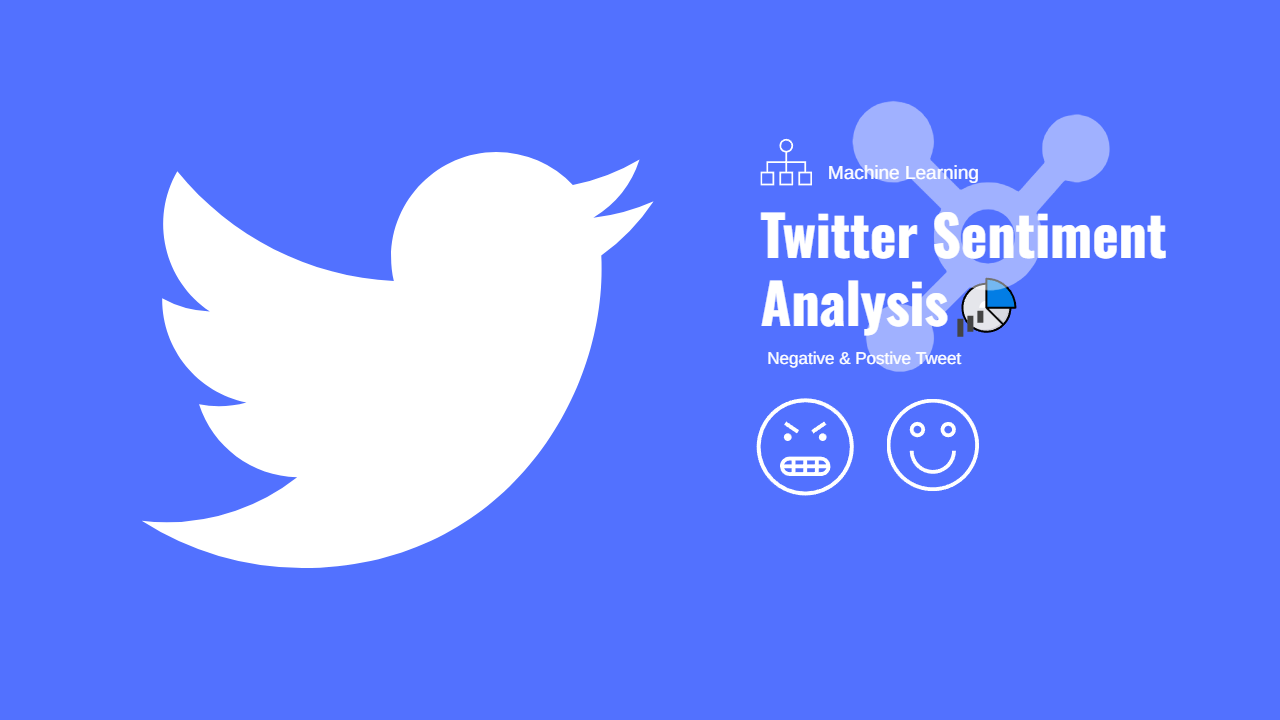

<h3>Twitter is a free social networking site where users broadcast short posts known as tweets. Twitter's primary purpose is to connect its users and allow them to share their thoughts with their followers and others through the use of hashtags. It can be a source of news, entertainment and a marketing tool for businesses.
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .</h3>

# WorkFlow Of Project

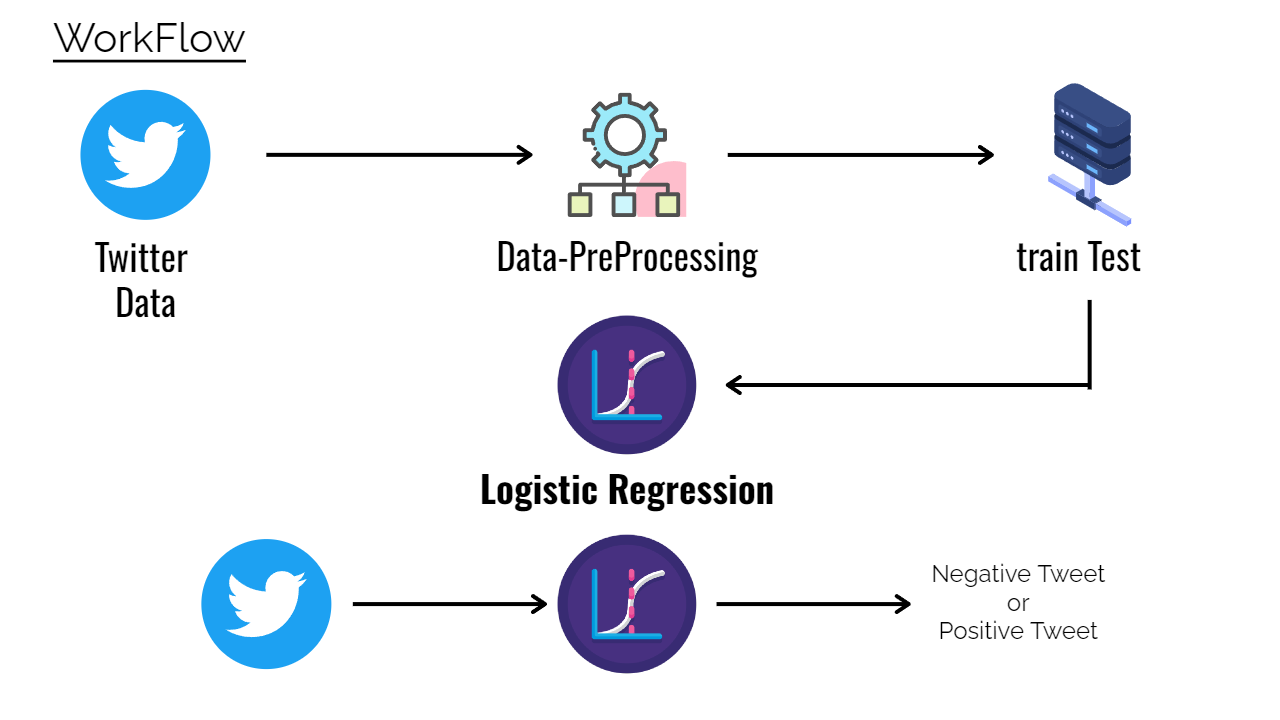

# Importing Dependencies

In [22]:
import pandas as pd
import numpy as np
import re
from tqdm.notebook import tqdm
tqdm.pandas()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Download Stopwords

In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Data PreProcessing

## Loading the Data and **Fixing it**

In [25]:
df = pd.read_parquet('/content/drive/MyDrive/twitter_tweets.parquet')
df = df.sample(400000)

In [26]:
df.shape

(400000, 6)

In [27]:
df.columns.to_list()

['target', 'id', 'date', 'flag', 'user', 'tweet']

## Checking the Null value in dataset

In [28]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
tweet     0
dtype: int64

Convert the target 4 to 1

In [29]:
df.replace({'target':{4:1}}, inplace = True)

### 0 --> Negative Tweets

### 1 --> Postivie Tweets

In [30]:
df['target'].value_counts()

0    200341
1    199659
Name: target, dtype: int64

## Stemming
### Stemming is the process of reducing a word to its root word.
#### example : actor, actress, acting = Act

In [31]:
port_stem = PorterStemmer()

In [32]:
def stemming(content):

  stemmed_content = re.sub('[^a-zA-Z]',' ',content) #it replaces anything that’s not a letter (a-z, A-Z) with a space.

  stemmed_content = stemmed_content.lower() # turn any big (uppercase) letters into small (lowercase) letters

  stemmed_content = stemmed_content.split() # break the sentence into individual words

  stemmed_content = [port_stem.stem(word) for word in stemmed_content # remove very common words because they don’t tell us much.
  # Then, we use a magic wand (the stemmer) to transform each word into its root form. For example, ‘running’, ‘runs’, ‘ran’ all become ‘run’.
                     if not word in stopwords.words('english')]

  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [33]:
df['stemmed_tweet'] = df['tweet'].progress_apply(stemming)

  0%|          | 0/400000 [00:00<?, ?it/s]

In [34]:
X = df['stemmed_tweet'].values
Y = df['target'].values

## Train Test and Split

In [35]:
x_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state=2)

## Vectorization

In [36]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

## traing the Machine Learning Model

In [37]:
model = LogisticRegression(max_iter=1000)

In [38]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

## Accuracy Score

### Accuracy score for training Data

In [39]:
x_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, x_train_prediction)

In [44]:
print(f'the Accuracy of Prediction is {(training_data_accuracy*100).round(2)}%')

the Accuracy of Prediction is 81.54%


### Accuracy score for test data

In [47]:
x_test_prediction = model.predict(X_test)
training_data_accuracy = accuracy_score(y_test, x_test_prediction)

In [48]:
print(f'the Accuracy of Prediction is {(training_data_accuracy*100).round(2)}%')

the Accuracy of Prediction is 77.29%


# Model Accuracy - 77.29%

# Saving the Model

In [53]:
import pickle
file1 = 'tweet_sentiment_analysis_model.sav'
pickle.dump(model,open(f'/content/drive/MyDrive/Twiiter Sentiment Analysis/{file1}', 'wb'))

# Deploying the Model

In [65]:
load_model = pickle.load(open('/content/drive/MyDrive/Twiiter Sentiment Analysis/tweet_sentiment_analysis_model.sav', 'rb'))

In [60]:
x_new = X_test[200]
print(y_test[200])

0


In [75]:
x_new = X_test[4]
print(y_test[4])

prediction = load_model.predict(x_new)
print(prediction)
if (prediction[0] == 0):
  print('Negative Tweet')

else:
  print('Postive Tweets')

0
[0]
Negative Tweet
